# Project: Investigate a Dataset (TMDb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> About the dataset

The dataset is called TMDB movie data. Downloaded from this page, its original version was removed by Kaggle and replaced with a similar set of movies and data fields from The Movie Database (TMDb). It contains more than 5000 movies and their rating and basic information . relevant data to be used in the following analysis include the following variables :
* budget
* revenue
* original_title 
* cast 
* director
* runtime
* genres
* vote_average
* release_year

in this report , i explore the following questions:
* what is the movie take a higher budget?
* what is the movie make a higher revenue?
* what is the movie make low revenue?
* what are top 5 actors making movies?
* what are top 5 years making most movies?
* what is the relation between vote_average and runtime?
* what is the describe of release year column?

this is the report:

In [26]:
#  import statements for all of the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [27]:
# Load the data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')

In [28]:
# load first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
# load last five rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [30]:
# know number of row and couinm
df.shape

(10866, 21)

# Assessing data 
make sure data is tidy and has a good quality

In [31]:
# get info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [32]:
# know number of missing data
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [33]:
#know number of movies thier budget equal zero
df['budget'].isin([0]).sum()

5696

In [34]:
#know number of movies thier revenue equal zero
df['revenue'].isin([0]).sum()

6016

In [35]:
# know number of duplicates
df.duplicated().sum()

1

In [36]:
# know data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning 

In [37]:
#define: drop all non necessary columns  
#code:
df.drop(['id', 'imdb_id', 'popularity','homepage','tagline' ,'keywords','overview' 
       ,'production_companies', 'release_date', 'vote_count', 
       'budget_adj', 'revenue_adj'], axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


In [38]:
#define: clear missing data
#code;
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10732 non-null  int64  
 1   revenue         10732 non-null  int64  
 2   original_title  10732 non-null  object 
 3   cast            10732 non-null  object 
 4   director        10732 non-null  object 
 5   runtime         10732 non-null  int64  
 6   genres          10732 non-null  object 
 7   vote_average    10732 non-null  float64
 8   release_year    10732 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 838.4+ KB


In [39]:
#define : cleare all zero values in revenue and budget
#code :
df['revenue'].drop([0],axis=0,inplace=True)
df['budget'].drop([0],axis=0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10732 non-null  int64  
 1   revenue         10732 non-null  int64  
 2   original_title  10732 non-null  object 
 3   cast            10732 non-null  object 
 4   director        10732 non-null  object 
 5   runtime         10732 non-null  int64  
 6   genres          10732 non-null  object 
 7   vote_average    10732 non-null  float64
 8   release_year    10732 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [40]:
#define: remove duplicates
#code:
df.drop_duplicates(inplace = True)
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


In [41]:
# get descriptive statistics
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000
mean,1.480365e+07,4.031989e+07,102.468829,5.964710,2001.259622
std,3.106456e+07,1.176524e+08,30.493873,0.930283,12.820151
min,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,1.600000e+07,2.500000e+07,112.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


now my data is loaded after made these changes :

* drop all non necessary columns:id ,imdb_id,popularity,homepage,tagline ,keywords,overview,production_companies,release_date,vote_count,budget_adj,revenue_adj.
* clear missing data
* cleare all zero values in budget and revenue
* remove duplicates

now the data is ready for analysing

# Exploratory Data Analysis

Research Question 1 (what is the movie take a higher budget?)

In [42]:
#get higher budget and match with movie
df[df['budget']==df['budget'].max()]['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

Research Question 2 (what is the movie make a higher revenue?)

In [43]:
#get higher revenue and match with movie
df[df['revenue']==df['revenue'].max()]['original_title']

1386    Avatar
Name: original_title, dtype: object

Research Question 3 (what is the movie make low revenue?)

In [44]:
#get lower revenue and match with movie
df[df['revenue']==df['revenue'].min()]['original_title']

48                            Wild Card
67                             Survivor
74               Mythica: The Darkspore
75       Me and Earl and the Dying Girl
92             Mythica: The Necromancer
                      ...              
10861                The Endless Summer
10862                        Grand Prix
10863               Beregis Avtomobilya
10864            What's Up, Tiger Lily?
10865          Manos: The Hands of Fate
Name: original_title, Length: 5888, dtype: object

Research Question 4 ( what are top 5 actors making movies?)

In [45]:
# get top 5 actors making movies
df['cast'].value_counts()[:5]

Louis C.K.                                                                          6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Bill Burr                                                                           3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                  3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Name: cast, dtype: int64

Research Question 5 (what are top 5 years making most movies?)

In [46]:
#get top 5 year making most movies
df['release_year'].value_counts().head()

2014    682
2013    649
2015    617
2012    574
2011    532
Name: release_year, dtype: int64

Research Question6(what is the relation between vote_average and runtime?)

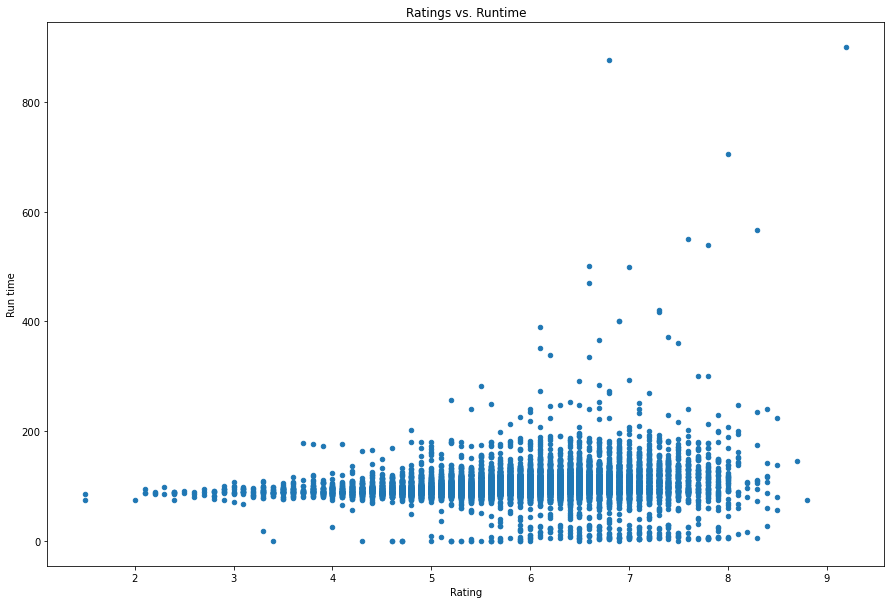

In [47]:
# Plot scatter plot of these two columns ,get the relation bye scatter
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Run time');

As we see in this scatter plot the relation between the time of movies take and average vote ,  when the time of movie increase also the vote in  positive way , that the time rang 125:135 minute makes  a higher vote above 7.0 , otherwise the movies less than 100 minute getting lower vote .

Research Question 7 (what is the corrlation between the columns?)

In [48]:
 # get the corrlation 
df.corr() 

,budget,revenue,runtime,vote_average,release_year
budget,1.000000,0.734487,0.192168,0.087318,0.119004
revenue,0.734487,1.000000,0.164276,0.178477,0.059072
runtime,0.192168,0.164276,1.000000,0.177276,-0.119286
vote_average,0.087318,0.178477,0.177276,1.000000,-0.127746
release_year,0.119004,0.059072,-0.119286,-0.127746,1.000000


The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
* The number varies from -1 to 1.
* 1 means a perfect correlation, we can see that "budget" and "budget" got the number 1.0, which makes sense, each column always has a perfect relationship with itself.
* 0.7 is also a good relationship, and if you increase one value, the other will probably increase as well.like in columns budget and revenue.
* -0.1 would be just as good relationship, but if you increase one value, the other will probably go down. Like columns runtime and release year.


Research Question 8 (what is the describe of release year column?)

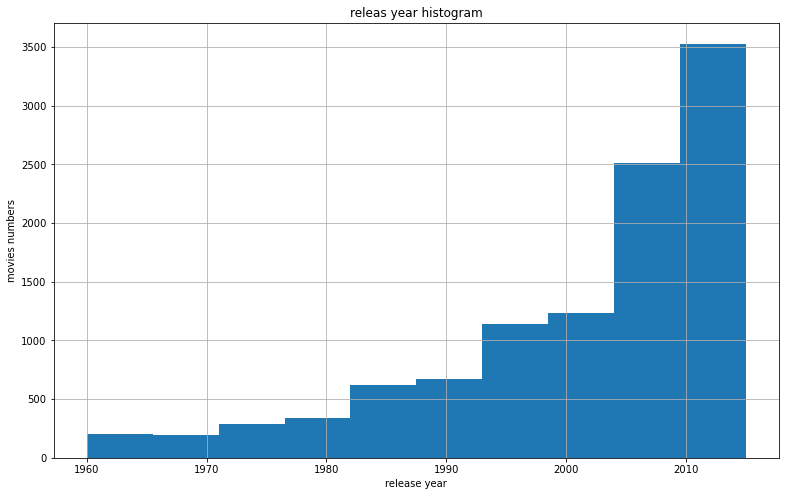

In [49]:
#get histogram of the data
df['release_year'].hist(figsize=(13,8));
plt.title('releas year histogram')
plt.xlabel('release year')
plt.ylabel('movies numbers');

In this histogram , show the number of movies according the year when  they made , as we see every 10 years number of movie increase , in 1960 cinema make almost 250 movies and this number grow until 2010 the number become more than 3500 movie .

# <a id='conclusions'></a>
## Conclusions



This report has analyzed the The Movie Database (TMDb), This dataset has very  information. After clean Some objectives in the datasetand answering the questions by analysing them this is  the concluions:
The Warrior's Way movie is the hieghest budget movie otherwise Avatar make hiegher profit , in 2014 most mives made in this year almost 682.
The relation between vote_average and runtime is positive the movies take more time make hiegher vote .


# limitations:


We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295